# Comparison of selected classification models 
## * Decission Tree
## * Random Forest
## * k-Nearest Neighbors

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [79]:
data=pd.read_excel('C:/Users/Dell/OneDrive/Pulpit/github/purchase.xlsx')
data.head()

,assortment,service,day,income,other,internet,credit_card,age,sex,loan,distance,purchases
0,54,64,2,2.1,3,0,0,54,0,1,1.6,1
1,86,88,6,2.3,2,0,1,72,1,1,6.5,1
2,56,60,2,2.1,3,0,0,56,1,0,0.4,1
3,54,61,2,2.1,3,0,1,60,1,1,6.5,1
4,63,60,2,2.1,3,0,0,41,1,1,7.3,1


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   assortment   7769 non-null   int64  
 1   service      7769 non-null   int64  
 2   day          7769 non-null   int64  
 3   income       7769 non-null   float64
 4   other        7769 non-null   int64  
 5   internet     7769 non-null   int64  
 6   credit_card  7769 non-null   int64  
 7   age          7769 non-null   int64  
 8   sex          7769 non-null   int64  
 9   loan         7769 non-null   int64  
 10  distance     7769 non-null   float64
 11  purchases    7769 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 728.5 KB


In [81]:
# checking for null
data.isnull().any()

assortment     False
service        False
day            False
income         False
other          False
internet       False
credit_card    False
age            False
sex            False
loan           False
distance       False
purchases      False
dtype: bool

### Descriptive statistics

In [82]:
data[['assortment','service','day','income','other','age','distance']].describe()

,assortment,service,day,income,other,age,distance
count,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000
mean,42.217016,54.119707,3.980049,2.406500,3.153173,48.101686,11.828356
std,26.518536,31.496695,1.516554,0.661705,1.560888,12.886545,7.678800
min,0.000000,0.000000,2.000000,1.000000,1.000000,18.000000,0.100000
25%,19.000000,27.000000,3.000000,2.000000,2.000000,39.000000,5.600000
50%,41.000000,56.000000,4.000000,2.300000,4.000000,48.000000,11.000000
75%,60.000000,84.000000,5.000000,2.900000,5.000000,58.000000,17.400000
max,90.000000,100.000000,7.000000,3.900000,6.000000,74.000000,102.000000


In [11]:
# division by gender
data[['assortment','service','day','income','other','age','distance','sex']].groupby('sex').mean()


,assortment,service,day,revenue,other,age,distance
sex,,,,,,,
0,33.783595,36.761158,3.851870,2.128372,4.091194,43.328106,13.080917
1,51.862859,73.973786,4.126656,2.724614,2.080298,53.561534,10.395723


<AxesSubplot:xlabel='sex'>

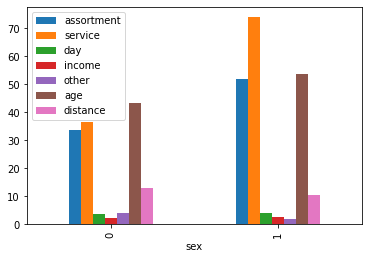

In [84]:
data[['assortment','service','day','income','other','age','distance','sex']].groupby('sex').mean().plot.bar()

<AxesSubplot:title={'center':'Are you going to shop at the supermarket X?'}>

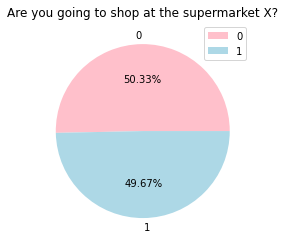

In [85]:
data['purchases'].value_counts().plot.pie(legend=True,
                                           ylabel='',
                                          autopct='%.2f%%',
                                          colors=['pink','lightblue'],
                                          title='Are you going to shop at the supermarket X?')

In [113]:
X = data.iloc[:, :-1]
y = data['purchases']
print(X)
print(y)

      assortment  service  day  income  other  internet  credit_card  age  \
0             54       64    2     2.1      3         0            0   54   
1             86       88    6     2.3      2         0            1   72   
2             56       60    2     2.1      3         0            0   56   
3             54       61    2     2.1      3         0            1   60   
4             63       60    2     2.1      3         0            0   41   
...          ...      ...  ...     ...    ...       ...          ...  ...   
7764           8        8    3     1.6      4         1            1   51   
7765          10       10    3     2.6      4         1            1   31   
7766          46       46    2     1.8      4         1            1   60   
7767          16       16    3     2.4      4         1            1   55   
7768          28       28    6     2.2      4         1            1   47   

      sex  loan  distance  
0       0     1       1.6  
1       1     1    

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.20, 
                                                    random_state=30)

## Decision Tree

In [115]:
dt_clf = DecisionTreeClassifier(criterion='gini', 
                                max_depth=5, 
                                random_state=30)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=30)

In [116]:
#prediction 
y_pred = dt_clf.predict(X_test)

Quality evaluation

In [117]:
# Accuracy
dt_clf.score(X_test, y_test)

0.8526383526383526

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


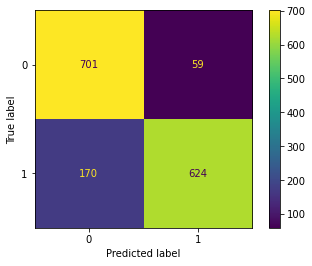

In [118]:
plot_confusion_matrix(dt_clf, X_test, y_test)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       760
           1       0.91      0.79      0.84       794

    accuracy                           0.85      1554
   macro avg       0.86      0.85      0.85      1554
weighted avg       0.86      0.85      0.85      1554



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


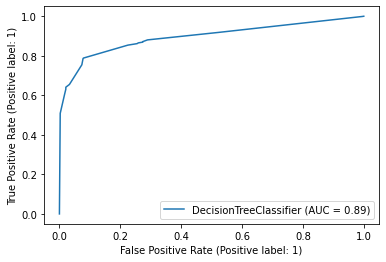

In [120]:
ROC_1 =  plot_roc_curve(dt_clf,X_test, y_test)

Variables importance

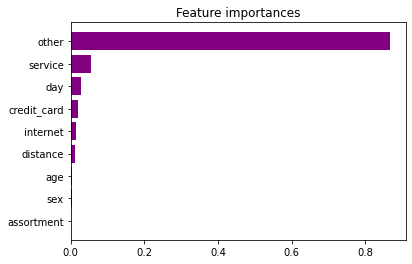

In [121]:
features = pd.DataFrame(dt_clf.feature_importances_, 
                        index=X.columns, 
                        columns=['Importances'])

features = features[features['Importances'] > 0]   
features.sort_values(by=['Importances'], inplace=True)

plt.barh(features.index, features['Importances'], color='purple')
plt.title('Feature importances')
plt.show()

## Random Forest

In [122]:
rf_clf = RandomForestClassifier(n_estimators=200, 
                                random_state=30, 
                                n_jobs=-1)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=30)

In [123]:
#prediction
y_pred = rf_clf.predict(X_test)

Quality evaluation

In [124]:
# Accuracy
rf_clf.score(X_test, y_test)

0.8526383526383526

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


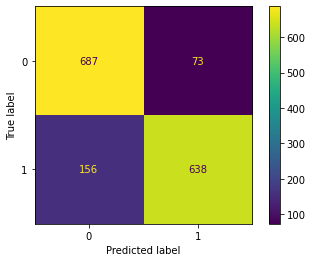

In [125]:
plot_confusion_matrix(rf_clf, X_test, y_test)

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       760
           1       0.90      0.80      0.85       794

    accuracy                           0.85      1554
   macro avg       0.86      0.85      0.85      1554
weighted avg       0.86      0.85      0.85      1554



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


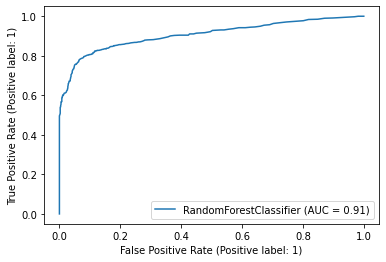

In [127]:
ROC_2 =  plot_roc_curve(rf_clf,X_test, y_test)

Variables importance

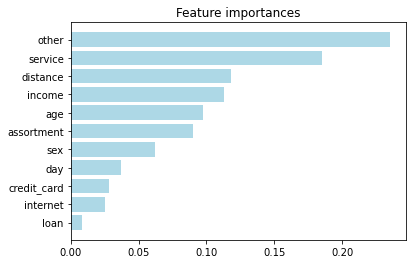

In [128]:
features = pd.DataFrame(rf_clf.feature_importances_, 
                        index=X.columns, 
                        columns=['Importances'])

features = features[features['Importances'] > 0]   
features.sort_values(by=['Importances'], inplace=True)

plt.barh(features.index, features['Importances'], color='lightblue')
plt.title('Feature importances')
plt.show()

## k- Nearest Neighbors

In [129]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [130]:
kNN_clf = KNeighborsClassifier(n_neighbors=11)

kNN_clf.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=11)

In [131]:
# Hyperparameters tuning 
param = GridSearchCV(kNN_clf,
                          param_grid={'n_neighbors':[3,5,7,9,11]},
                          cv=3,
                          scoring='accuracy')
param.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [132]:
print(param.best_params_)
print(param.best_score_)

{'n_neighbors': 11}
0.8339501120766211


In [133]:
#prediction
y_pred = kNN_clf.predict(X_test_std)

Quality evaluation


In [134]:
# Accuracy
kNN_clf.score(X_test_std, y_test)

0.8333333333333334

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


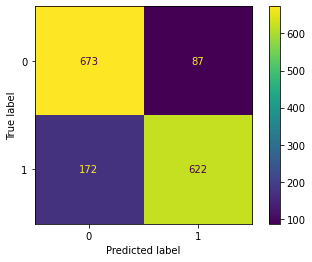

In [135]:
plot_confusion_matrix(kNN_clf, X_test_std, y_test)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       760
           1       0.88      0.78      0.83       794

    accuracy                           0.83      1554
   macro avg       0.84      0.83      0.83      1554
weighted avg       0.84      0.83      0.83      1554



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


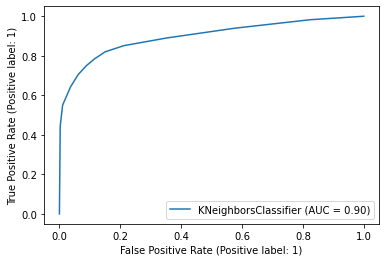

In [137]:
ROC_3 =  plot_roc_curve(kNN_clf,X_test_std, y_test)